In [35]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from netCDF4 import Dataset

In [36]:
import cmocean
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np

import cmocean.cm as cm

cmaps = {
    'w':  {'cm': 'seismic',   'label': 'vertical velocity [m/s]'},
    'wspd': {'cm': 'gist_stern_r',              'label': 'windspeed [m/s]'},
    'wdir': {'cm': cmocean.cm.phase,   'label': 'wind direction [deg]'},
    'pt': {'cm': cmocean.cm.thermal, 'label': 'potential temperature [C]'},
    't': {'cm': cmocean.cm.thermal, 'label': 'temperature [C]'},
    'q':  {'cm': cmocean.cm.haline_r,  'label': 'q [g/kg]'},
    'dp': {'cm': cmocean.cm.haline_r,  'label': 'dewpoint [C]'},
    'rh': {'cm': cmocean.cm.haline_r,  'label': 'RH [%]'},
    'std': {'cm': cmocean.cm.thermal,  'label': 'Standard Deviation'}
}


def timeheight(time, height, data, field, ax, datemin=None, datemax=None,
                datamin=None, datamax=None, zmin=None, zmax=None, cmap=None, **kwargs):
    '''
    Produces a time height plot of a 2-D field
    :param time: Array of times (1-D or 2-D but must have same dimenstions as height)
    :param height: Array of heights (1-D or 2-D but must have same dimensions as time)
    :param data: Array of the data to plot (2-D)
    :param field: Field being plotted. Currently supported:
        'w': Vertical Velocity
        'ws': Wind Speed
        'wd': Wind Direction
        'pt': Potential Temperature
        'q':  Specific Humidity
        'dp': Dewpoint
        'rh': Relative Humidity
        'std': Standard Deviation
    :param ax: Axis to plot the data to
    :param datemin: Datetime object
    :param datemax: Datetime object
    :param datamin: Minimum value of data to plot
    :param datamax: Maximum value of data to plot
    :param zmin: Minimum height to plot
    :param zmax: Maximum height to plot
    :return:
    '''

    # Get the colormap and label of the data
    if cmap is None:
        cm, cb_label = cmaps[field]['cm'], cmaps[field]['label']
    else:
        cm, cb_label = cmap, cmaps[field]['label']

    # Convert the dates to matplolib format if not done already
    if time.ndim == 1 and height.ndim == 1:
        time = mdates.date2num(time)
        time, height = np.meshgrid(time, height)

    # Create the plot
    c = ax.pcolormesh(time, height, data, vmin=datamin, vmax=datamax, cmap=cm, **kwargs)

    # Format the colorbar
    # c.cmap.set_bad('grey', 1.0)
    cb = plt.colorbar(c, ax=ax)
    cb.set_label(cb_label)

    # Format the limits
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.HourLocator())
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H%M'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    if zmin is not None and zmax is not None:
        ax.set_ylim(zmin, zmax)
    if datemin is not None and datemax is not None:
        ax.set_xlim(mdates.date2num(np.array([datemin, datemax])))

    # Set the labels
    ax.set_ylabel('Height [m]')
    ax.set_xlabel('Time [UTC]')

    return ax

In [55]:
filename = 'dltruckdlcsmwindsDL1.a1.20241028.000000.cdf'
nc = Dataset(filename, 'r')

# Print out the netCDF header so you know what's in there
print (nc)

# Grab the times, heights, and data we're interested in 
times = np.array([datetime.utcfromtimestamp(d) for d in nc['base_time'][0]+nc['time_offset'][:]])
heights = nc['height'][:] * 1e3
wspd = nc['wspd'][:]
w = nc['w'][:]
wdir = nc['wdir'][:]
nc.close()

filename = 'dltruckdlcsmwindsDL1.a2.20241028.000000.cdf'
nc = Dataset(filename, 'r')

# Print out the netCDF header so you know what's in there
print (nc)

# Grab the times, heights, and data we're interested in 
times2 = np.array([datetime.utcfromtimestamp(d) for d in nc['base_time'][0]+nc['time_offset'][:]])
heights2 = nc['height'][:] * 1e3
wspd2 = nc['wspd'][:]
w2= nc['w'][:]
wdir2 = nc['wdir'][:]
nc.close()

filename = 'dltruckdlcsmwindsDL1.a3.20241028.000000.cdf'
nc = Dataset(filename, 'r')

# Print out the netCDF header so you know what's in there
print (nc)

# Grab the times, heights, and data we're interested in 
times3 = np.array([datetime.utcfromtimestamp(d) for d in nc['base_time'][0]+nc['time_offset'][:]])
heights3 = nc['height'][:] * 1e3
wspd3 = nc['wspd'][:]
w3 = nc['w'][:]
wdir3 = nc['wdir'][:]
nc.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    System: CLAMPS Doppler Lidar
    Date created: 2024-11-18T15:37:12.292305
    dimensions(sizes): time(693), height(400), rows(3), cols(3)
    variables(dimensions): float64 height(height), int64 base_time(), float32 rows(rows), float32 cols(cols), float64 time_offset(time), float64 hour(time), float32 u(time, height), float32 v(time, height), float32 w(time, height), float32 wspd(time, height), float32 wdir(time, height), float32 wspd_sigma(time, height), float32 wdir_sigma(time, height), float32 rms(time, height), float32 covariance_matrix(time, height, rows, cols), float32 cn(time, height), float32 r_sq(time, height), float32 intensity(time, height), float32 lat(time), float32 lon(time), float32 alt(time)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    System: CLAMPS Doppler Lidar
    Date created: 2024-11-18T15:50:24.067976
    dimensions(s

/var/folders/gs/zwmmp28x3fxdv4y3mz__qq280000gn/T/ipykernel_12645/2271984384.py:8: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  times = np.array([datetime.utcfromtimestamp(d) for d in nc['base_time'][0]+nc['time_offset'][:]])
/var/folders/gs/zwmmp28x3fxdv4y3mz__qq280000gn/T/ipykernel_12645/2271984384.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  times2 = np.array([datetime.utcfromtimestamp(d) for d in nc['base_time'][0]+nc['time_offset'][:]])
/var/folders/gs/zwmmp28x3fxdv4y3mz__qq280000gn/T/ipykernel_12645/2271984384.py:36: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and schedule

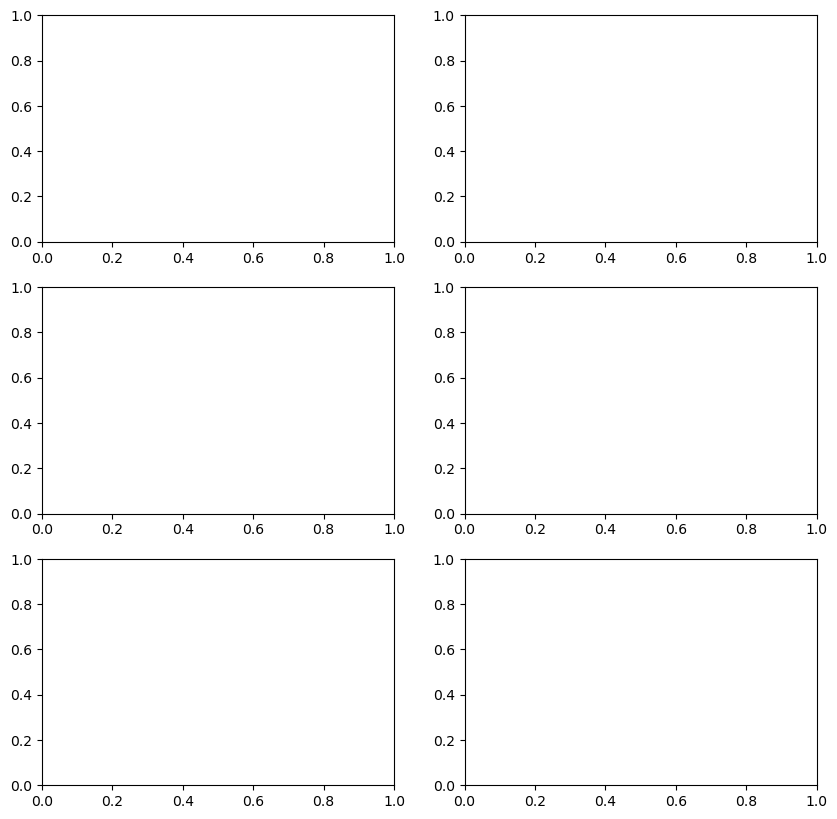

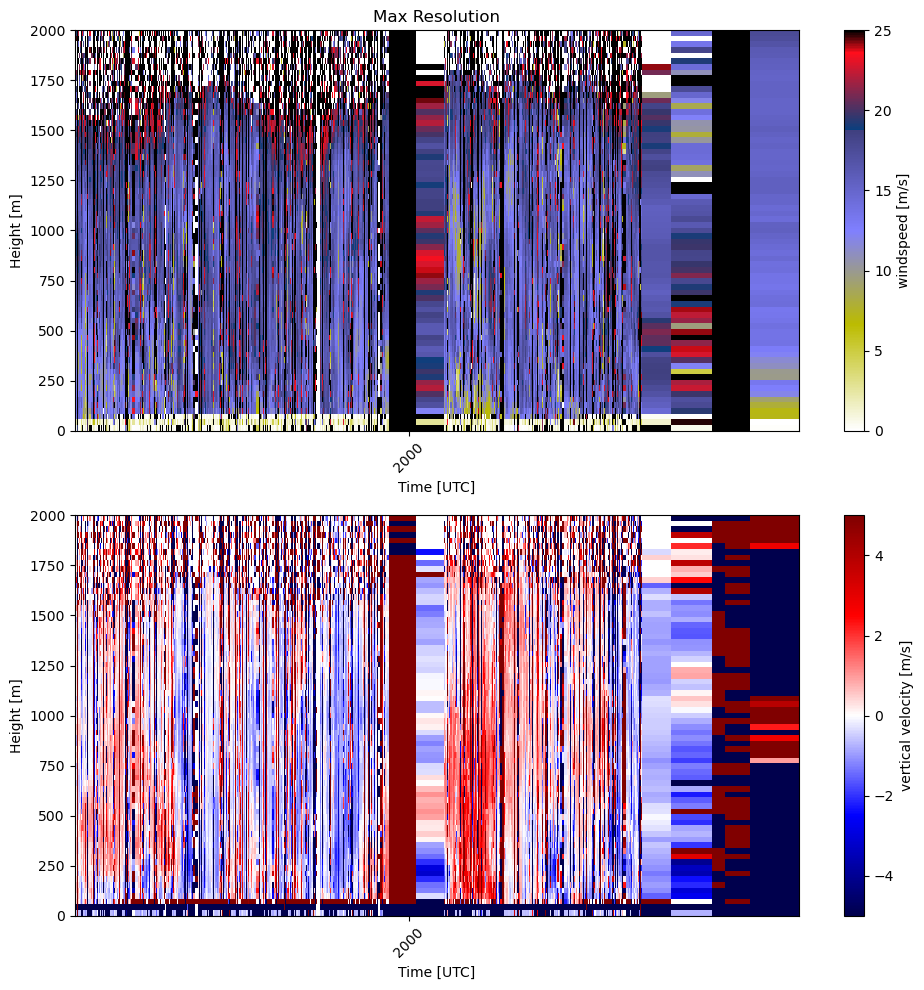

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = timeheight(times, heights, wspd.T, 'wspd', ax1, datamin=0, datamax=25, zmin=0, zmax = 2000) 

ax2 = timeheight(times, heights, w.T, 'w', ax2, datamin=-5, datamax=5, zmin=0, zmax = 2000) 
ax1.set_title('Max Resolution')
plt.tight_layout()
plt.savefig(filename.replace('.cdf', '.png'))
plt.show()


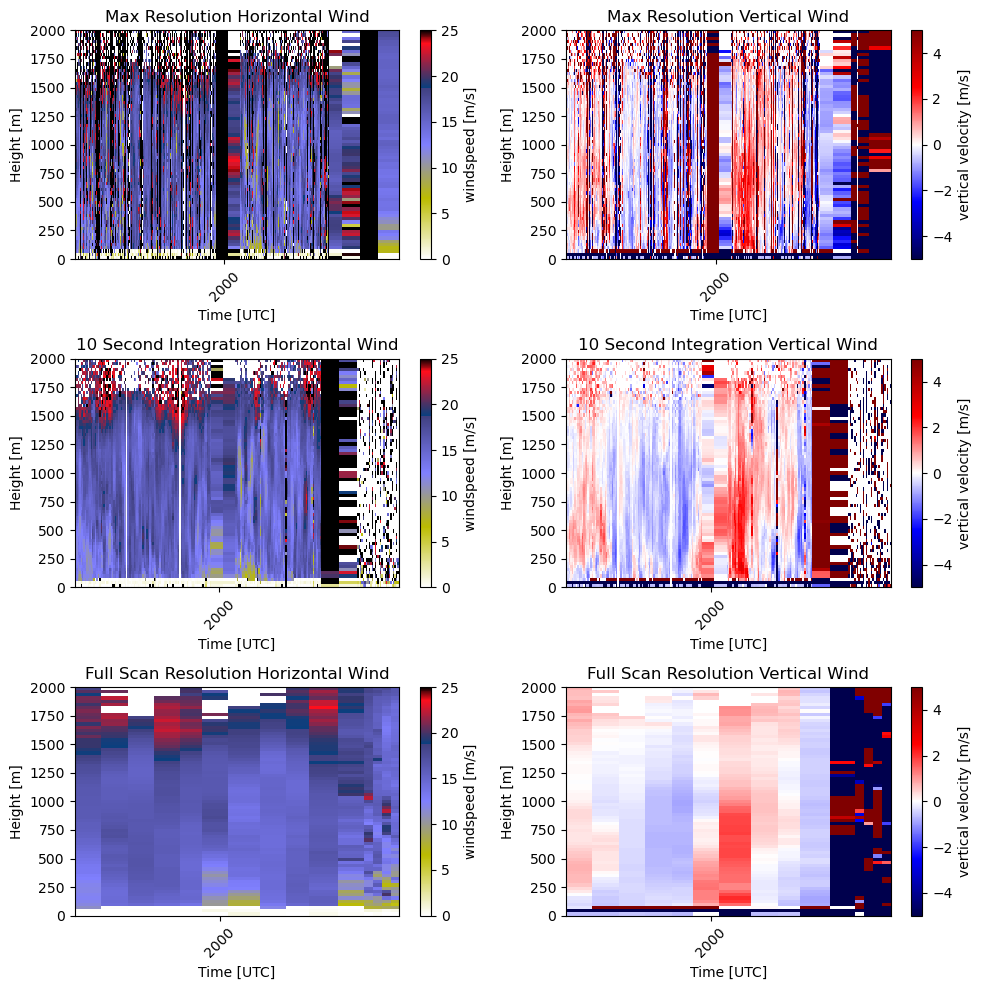

In [62]:
fig, axs = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0] = timeheight(times, heights, wspd.T, 'wspd', axs[0,0], datamin=0, datamax=25, zmin=0, zmax = 2000) 
axs[0,0].set_title('Max Resolution Horizontal Wind')

axs[0,1] = timeheight(times, heights, w.T, 'w', axs[0,1], datamin=-5, datamax=5, zmin=0, zmax = 2000) 
axs[0,1].set_title('Max Resolution Vertical Wind')

axs[1,0] = timeheight(times2, heights2, wspd2.T, 'wspd', axs[1,0], datamin=0, datamax=25, zmin=0, zmax = 2000) 
axs[1,0].set_title('10 Second Integration Horizontal Wind')

axs[1,1] = timeheight(times2, heights2, w2.T, 'w', axs[1,1], datamin=-5, datamax=5, zmin=0, zmax = 2000) 
axs[1,1].set_title('10 Second Integration Vertical Wind')

axs[2,0] = timeheight(times3, heights3, wspd3.T, 'wspd', axs[2,0], datamin=0, datamax=25, zmin=0, zmax = 2000) 
axs[2,0].set_title('Full Scan Resolution Horizontal Wind')

axs[2,1] = timeheight(times3, heights3, w3.T, 'w', axs[2,1], datamin=-5, datamax=5, zmin=0, zmax = 2000) 
axs[2,1].set_title('Full Scan Resolution Vertical Wind')


plt.tight_layout()
plt.savefig('p1.png')
plt.show()